# MCMC Comparison

## surmise

1. Train a GP (using surmise) to emulate the ${}^3{\rm He}(\alpha,\gamma)$ observables. 
2. Use that GP to calculate the $R$-matrix parameter posteriors.
3. Compare to the results in our BRICK paper.


* CS model
* maximally 1000 training points

In [1]:
import os
import subprocess

import numpy as np
import matplotlib.pyplot as plt
from corner import corner
import seaborn as sns
import emcee
import dill as pickle

import model

In [2]:
plt.style.use('science')
gr = (1 + np.sqrt(5)) / 2
h = 3

plt.rcParams['figure.dpi'] = 150

In [3]:
b = emcee.backends.HDFBackend('emulators/backends/eps_1.0000e-02_ntrain_500_fat_0.3.h5')

with open('emulators/emu_eps_1.0000e-02_ntrain_500_fat_0.3.pkl', 'rb') as f:
    emu = pickle.load(f)

In [4]:
chain = b.get_chain()

In [5]:
design_chain = np.load('datfiles/posterior_chain.npy')

def plot_chain_summary(ch, ax):
    low, med, high = np.quantile(ch, [0.16, 0.5, 0.84])
    ax.axhspan(low, high, color='C1', alpha=0.5)
    ax.axhline(med, color='C1')

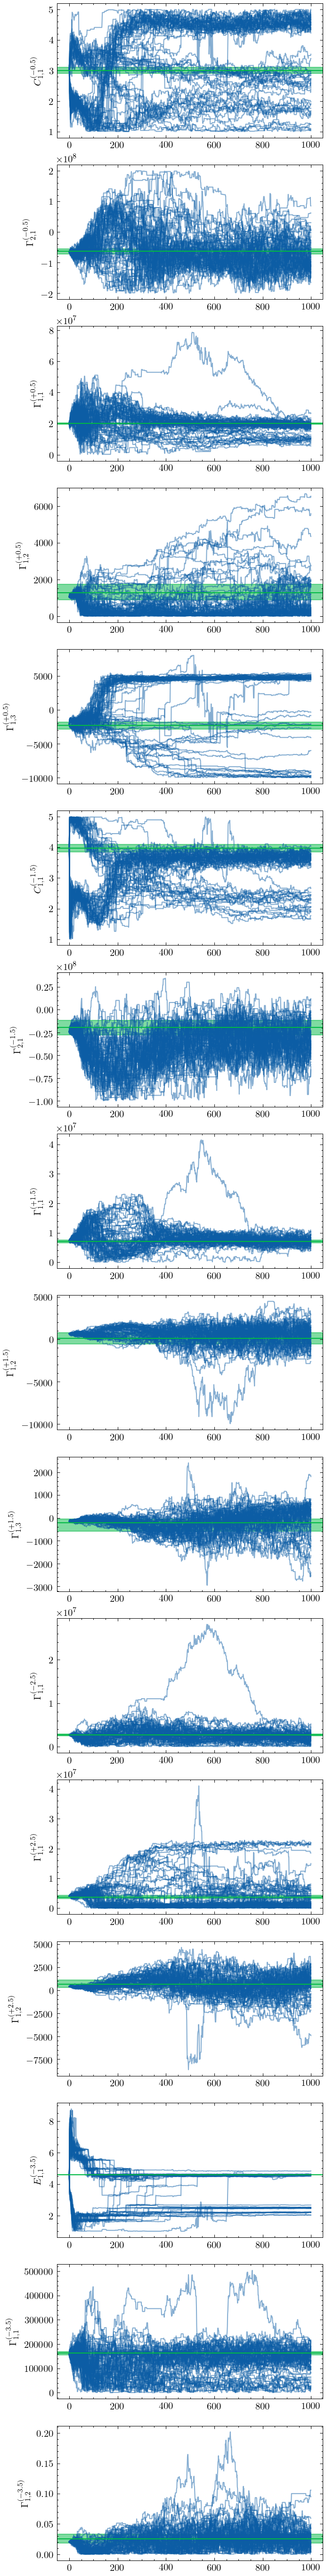

In [6]:
fig, ax = plt.subplots(model.nrpar, figsize=(gr*h, model.nrpar*h))
fig.patch.set_facecolor('white')

for i in range(model.nrpar):
    ax[i].plot(chain[:, :, i], alpha=0.5, color='C0')
    ax[i].set_ylabel(model.azr.config.labels[i])
    plot_chain_summary(design_chain[:, i], ax[i])

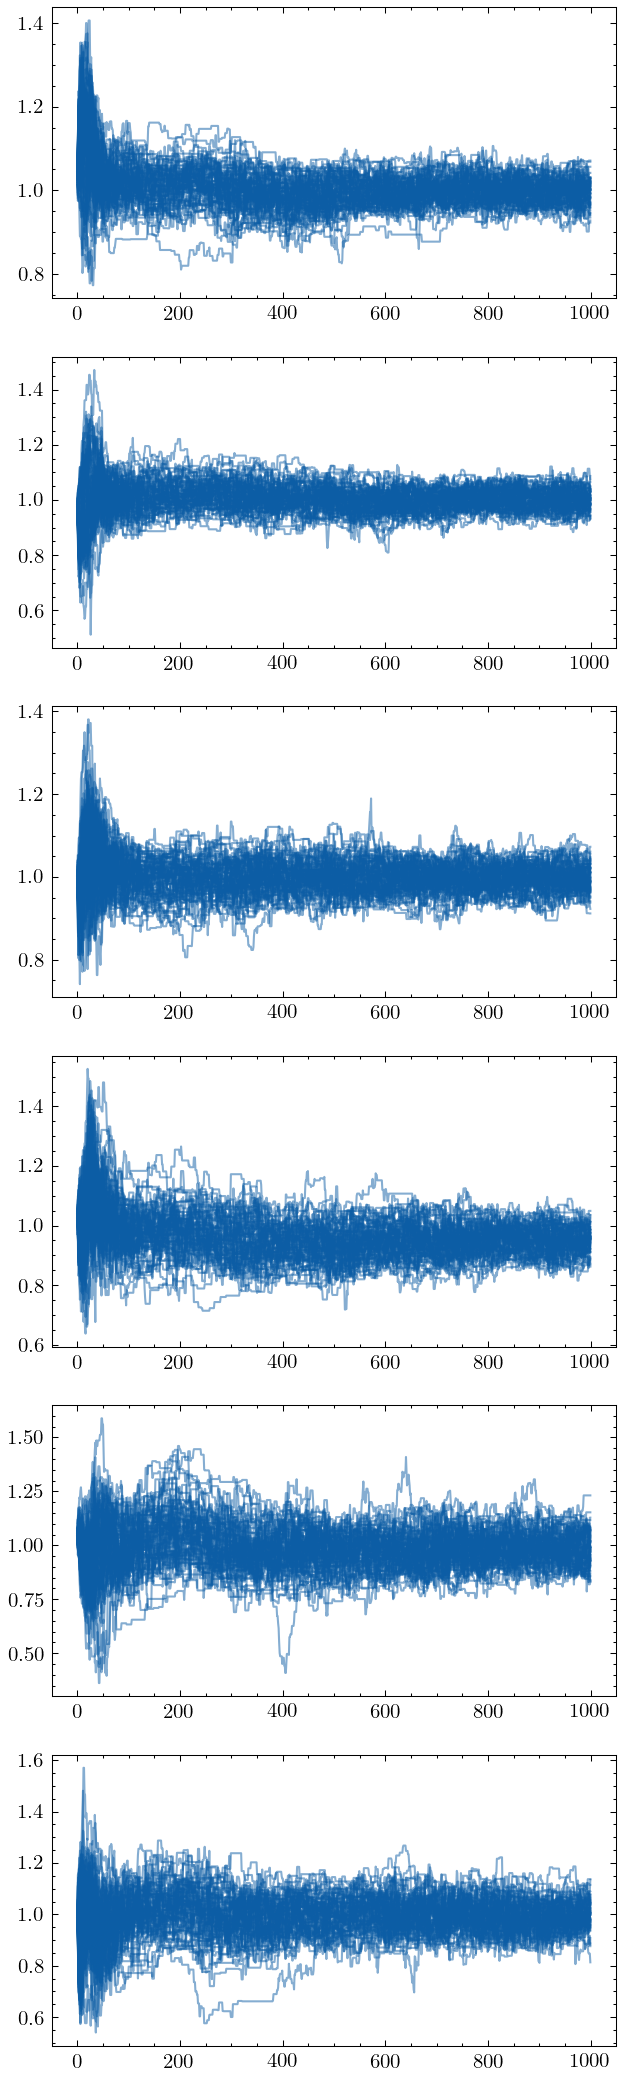

In [9]:
fig, ax = plt.subplots(model.nf_capture, 
                       figsize=(gr*h, model.nf_capture*h))
fig.patch.set_facecolor('white')

for (j, i) in enumerate(range(model.nrpar, model.nrpar + model.nf_capture)):
    ax[j].plot(chain[:, :, i], alpha=0.5, color='C0')
#     ax[j].set_ylabel(model.azr.config.labels[i])

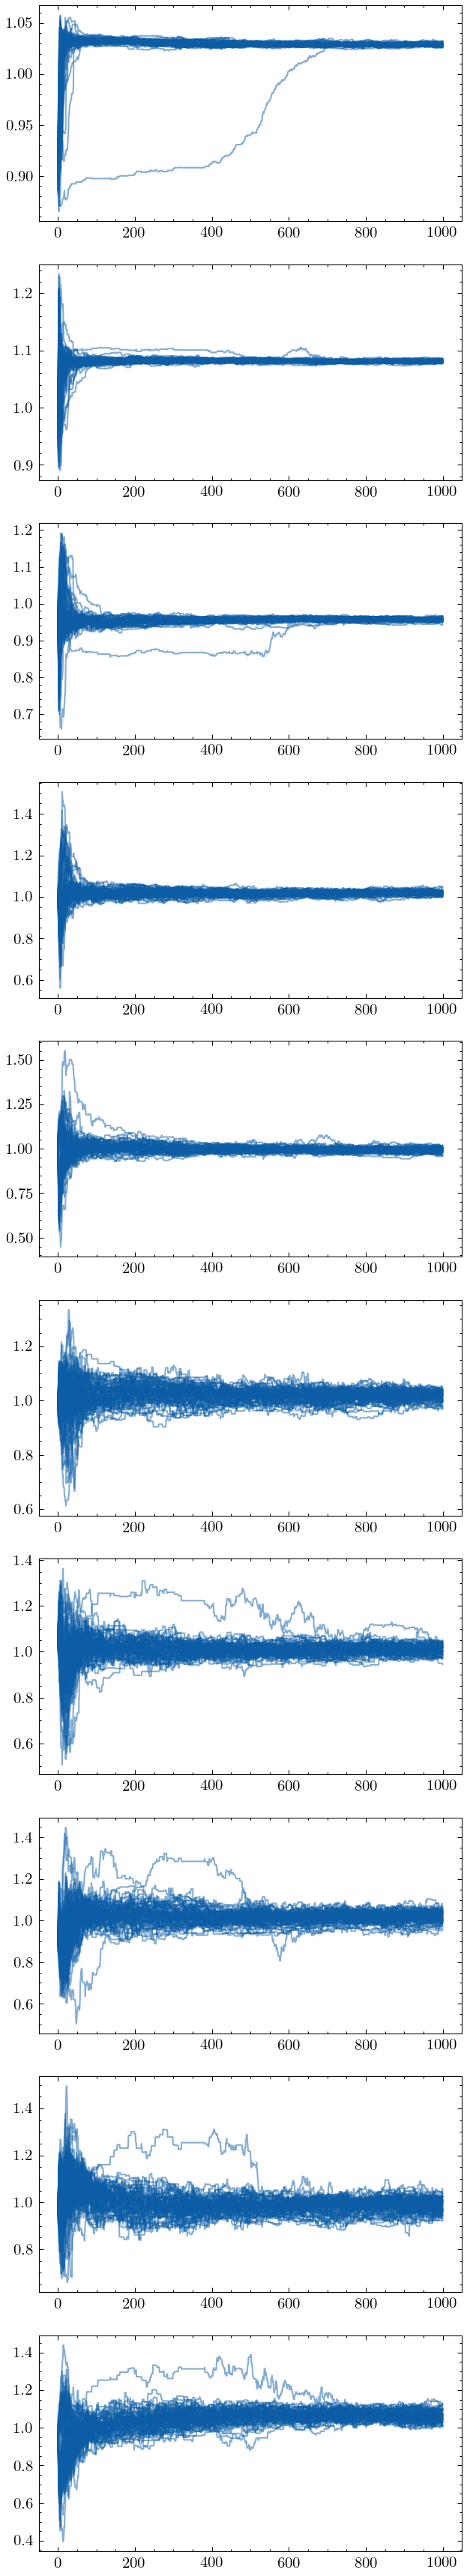

In [10]:
fig, ax = plt.subplots(model.nf_scatter, 
                       figsize=(gr*h, model.nf_scatter*h))
fig.patch.set_facecolor('white')

for (j, i) in enumerate(range(model.nrpar + model.nf_capture, model.ndim)):
    ax[j].plot(chain[:, :, i], alpha=0.5, color='C0')
#     ax[j].set_ylabel(model.azr.config.labels[i])

In [11]:
n1 = model.nbr
n2 = model.nxs

In [12]:
flat_chain = b.get_chain(flat=True)
lnp = b.get_log_prob(flat=True)
theta_star = flat_chain[np.argmax(lnp), :]

In [13]:
mu_star = model.calculate_norm(theta_star)

In [14]:
p = emu.predict(theta=theta_star[:model.nrpar])
mu_star_gp = p.mean().flatten()
mu_star_gp_var = p.var().flatten()

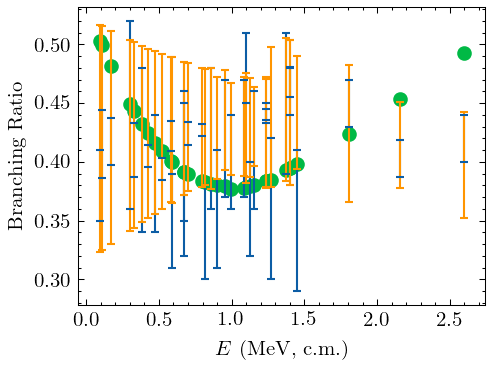

In [15]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')

ax.errorbar(model.x[:n1], model.y[:n1], yerr=model.dy[:n1], linestyle='', capsize=2)
ax.scatter(model.x[:n1], mu_star[:n1], color='C1')
ax.errorbar(model.x[:n1], mu_star_gp[:n1], yerr=np.sqrt(mu_star_gp_var[:n1]), linestyle='', capsize=2, color='C2')

ax.set_ylabel('Branching Ratio')
ax.set_xlabel('$E$ (MeV, c.m.)');

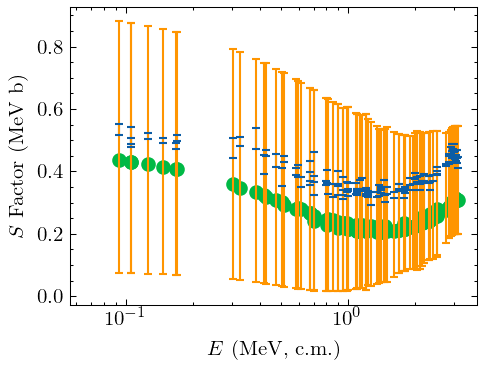

In [16]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')

ax.errorbar(model.x[n1:n1+n2], 1000*model.y[n1:n1+n2], yerr=1000*model.dy[n1:n1+n2], linestyle='',
            capsize=2)
ax.scatter(model.x[n1:n1+n2], 1000*mu_star[n1:n1+n2], color='C1')
ax.errorbar(model.x[n1:n1+n2], 1000*mu_star_gp[n1:n1+n2], yerr=1000*np.sqrt(mu_star_gp_var[n1:n1+n2]), linestyle='',
            capsize=2, color='C2')

ax.set_ylabel('$S$ Factor (MeV b)')
ax.set_xlabel('$E$ (MeV, c.m.)')
ax.set_xscale('log');

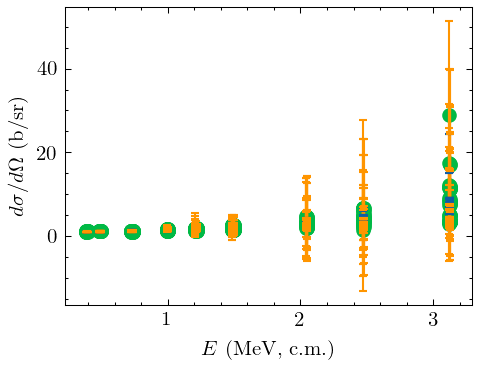

In [17]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')

ax.errorbar(model.x[n1+n2:], model.y[n1+n2:], yerr=model.dy[n1+n2:], linestyle='',
            capsize=2)
ax.scatter(model.x[n1+n2:], mu_star[n1+n2:], color='C1')
ax.errorbar(model.x[n1+n2:], mu_star_gp[n1+n2:], yerr=np.sqrt(mu_star_gp_var[n1+n2:]), linestyle='',
            capsize=2, color='C2')

ax.set_ylabel(r'$d\sigma/d\Omega$ (b/sr)')
ax.set_xlabel('$E$ (MeV, c.m.)');